# Outlier
Anomaly, extreme, noise

Many statistical analysis use squared terms (variance, ANOVA, polynomials, etc.) and are sensitive to outliers.

Large outliers become huge when squared.

## How to deal with outliers

Strategy 1: Remove outliers
 - Identify outliers and remove them from the dataset prior to analysis.

 Assumption: outliers are noise

Strategy 2: 
- Leave outliers in the dataset and use robust statistical techniques that
attentuate the negative effect of outliers on the result.

Assumption: outliers are valid data

Conclusions: 
- Outliers must be investigate and evaluated. 
- Never remove  outliers without a good reason. 
- Never just ignore outliers.

## Z-score method

$$ z = \frac{x - \mu}{\sigma} $$

Mean-center and standard deviation are normalized.

Z-scores are interpreted as the number of standard deviations a given value $x$ is away from the mean $\mu$.

Z-score are valid if the distribution is (roughly) normal.

Algorithm:
- Convert data to z-scores
- A datapoint is an outlier if $|z| > 3$ (exceed threshold by 3 standard deviations)
- Remove outliers and repeat

## Modified Z-score method

$$ z_i = \frac{0.6745(x_i - \tilde{x})}{MAD} $$
where $\tilde{x}$ is the median and $MAD$ is the median absolute deviation.

$$ MAD = median(|x_i - \tilde{x}|) $$
where $x_i$ is the $i$th data point.

For non-normal distiriutions, the median and MAD are more robust than the mean and standard deviation.

For non-normal distributions:
- Replace "regular" z-score with modified z-score
- Repeat previous methods

Useful for long tailed distributions.

## Eucledian distance

$$ d = \sqrt{\sum_{i=1}^n (x_i - y_i)^2} $$

## Multivarient outlier detection

1. Compute data mean
2. Compute the distance from each data point to the mean
3. Convert distances to Z-scores
4. Remove outliers based on threshold

## Outlier detection

- Outlier detection
    - Univariate
    - Multivariate

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels import robust

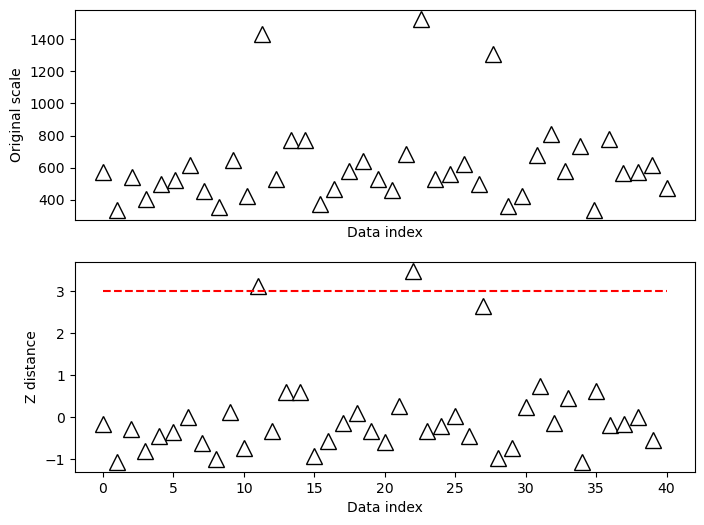

In [5]:
## Create some data

N = 40 
data = np.random.randn(N) # N(0,1)
data[data < -1] = data[data < -1]+2
data[data > 2] = data[data > 2]**2 # try to force some outliers
data = data*200 + 500 # scale and shift the data

dataz = (data - np.mean(data))/np.std(data)

zscorethreshold = 3

## Plot the data

fig, ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_ylabel('Original scale')
ax[0].set_xlabel('Data index')

ax[1].plot(dataz,'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0,N],[zscorethreshold,zscorethreshold],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')
plt.show()

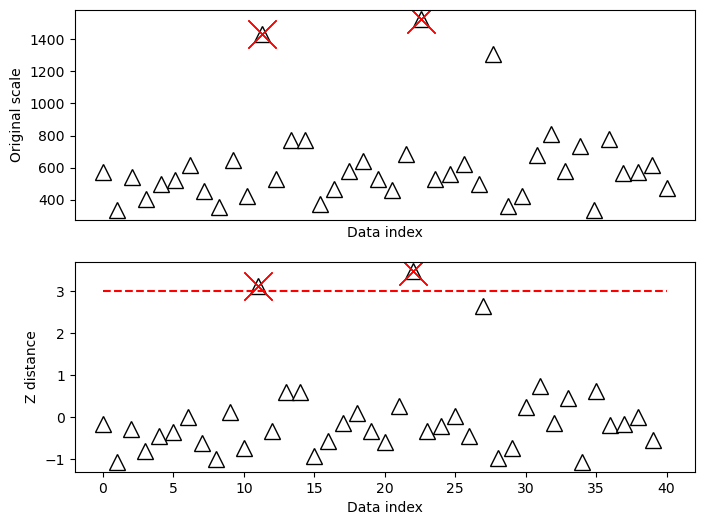

In [8]:
## Find the outliers
outliers = np.where(np.abs(dataz) > zscorethreshold)[0]

## Plot the outliers
ax[0].plot(outliers,data[outliers],'x', color='r', markersize=20)
ax[1].plot(outliers,dataz[outliers],'x', color='r', markersize=20)

fig

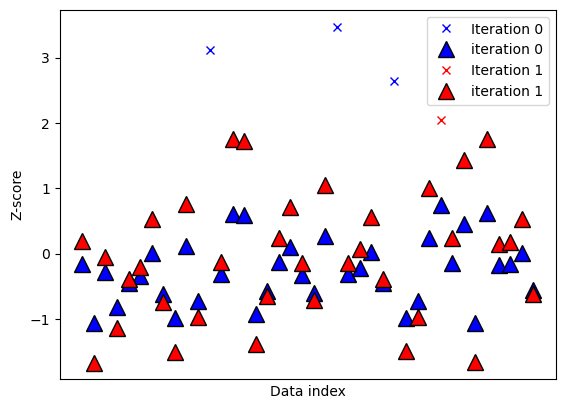

[11 22 27 31]


In [10]:
# iterative method

zscorethreshold = 2

dataz = (data - np.mean(data))/np.std(data)

colorz = 'brkm'
numiters = 0

while True:
    datamean = np.nanmean(dataz)
    datastd = np.nanstd(dataz)
    dataz = (dataz - datamean)/datastd

    toremove = dataz > zscorethreshold

    if sum(toremove) == 0:
        break
    else:
        plt.plot(np.where(toremove)[0],dataz[toremove],'%sx'%colorz[numiters], label='Iteration %d'%numiters)
        dataz[toremove] = np.nan

    plt.plot(dataz,'k^', markerfacecolor=colorz[numiters], label='iteration %g'%numiters, markersize=12)
    numiters += 1

plt.xticks([])
plt.xlabel('Data index')
plt.ylabel('Z-score')
plt.legend()
plt.show()

removeFromOriginal = np.where(np.isnan(dataz))[0]
print(removeFromOriginal)

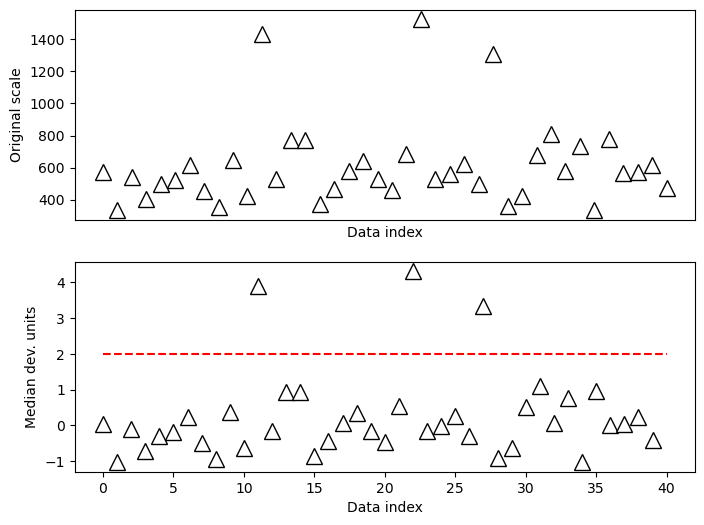

In [11]:
## modified Z for non-normal distributions

dataMed = np.median(data)
dataMAD = robust.mad(data)

datamz = stats.norm.ppf(0.75)*(data - dataMed)/dataMAD

fig, ax = plt.subplots(2,1,figsize=(8,6))
ax[0].plot(data,'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_ylabel('Original scale')
ax[0].set_xlabel('Data index')

ax[1].plot(datamz,'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0,N],[zscorethreshold,zscorethreshold],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units')
plt.show()

# Mutivariate outlier detection

In [12]:
import numpy as np
import matplotlib.pyplot as plt

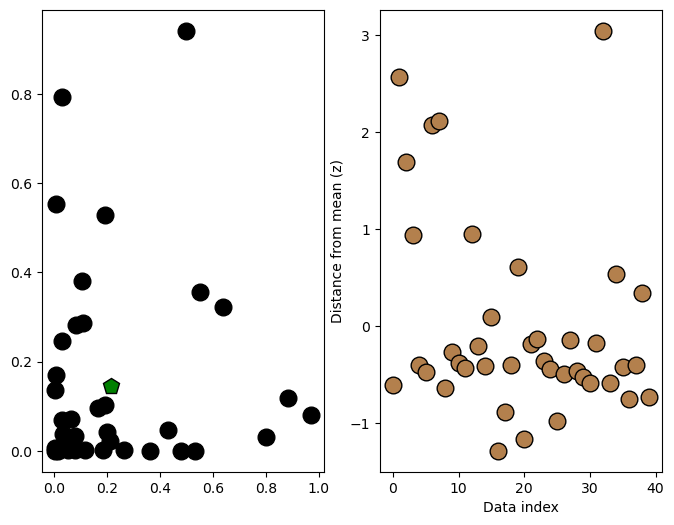

In [17]:
# create some data

N = 40

d1 = np.exp(-abs(np.random.randn(N)*3))
d2 = np.exp(-abs(np.random.randn(N)*5))
datamean = [np.mean(d1), np.mean(d2)]

# compute distance from mean

ds = np.zeros(N)
for i in range(N):
    ds[i] = np.sqrt((d1[i] - datamean[0])**2 + (d2[i] - datamean[1])**2)


# convert to z-score
ds = (ds - np.mean(ds))/np.std(ds)

# plot the data
fig, ax = plt.subplots(1,2,figsize=(8,6))
ax[0].plot(d1,d2,'ko', markerfacecolor='k', markersize=12)
#ax[0].set_xticks([])
#ax[0].set_yticks([])

ax[0].plot(datamean[0],datamean[1],'kp', markerfacecolor='g', markersize=12)

ax[1].plot(ds,'ko', markerfacecolor=[.7,.5,.3], markersize=12)
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Distance from mean (z)')

plt.show()

[ 1  6  7 32]


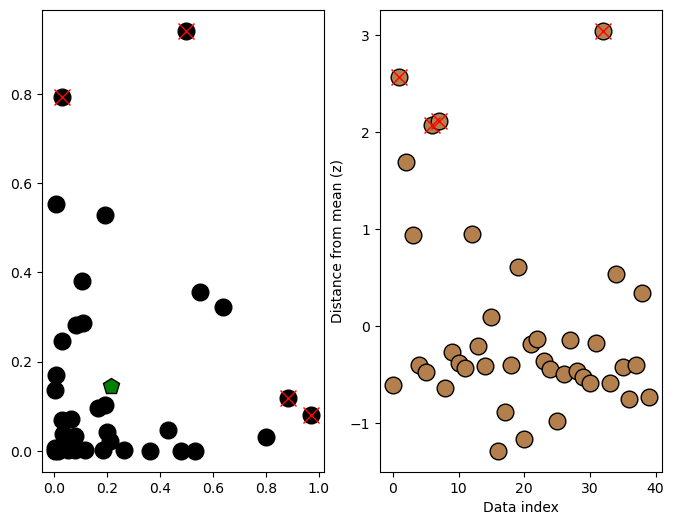

In [18]:
distanceThreshold = 2

oidx = np.where(ds > distanceThreshold)[0]

print(oidx)

ax[1].plot(oidx,ds[oidx],'rx', markersize=12)
ax[0].plot(d1[oidx],d2[oidx],'rx', markersize=12)

fig